#  Supervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\TEDWI\OneDrive\Project 6'

In [4]:
Store = pd.read_pickle(os.path.join(path, 'df_store_new.pkl'))

## Data Cleaning


In [5]:
Store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [6]:
Store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
Store.shape

(9789, 17)

In [8]:
# columns do not require renaming

In [9]:
# Check for missing values

Store.isnull().sum()

# No missing values to handle

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
# check for duplicates
dups = Store.duplicated()

In [11]:
dups.shape # No dups

(9789,)

C:\Users\TEDWI\AppData\Local\Temp\ipykernel_22440\2102103030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Store['Sales'], bins=25) # Shows extreme values


<Axes: xlabel='Sales', ylabel='Density'>

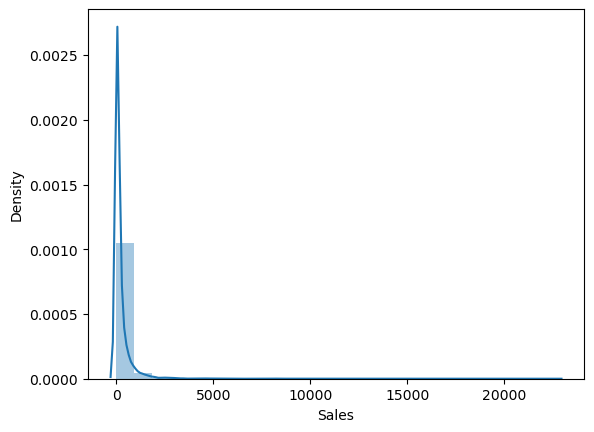

In [12]:
# extreme values check
sns.distplot(Store['Sales'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [13]:
Store['Sales'].mean() # Check the mean

230.1161929410563

In [14]:
Store['Sales'].median() # Check the median

54.384

In [15]:
Store['Sales'].max() # Check the max

22638.48

## Prep For Regression Analysis

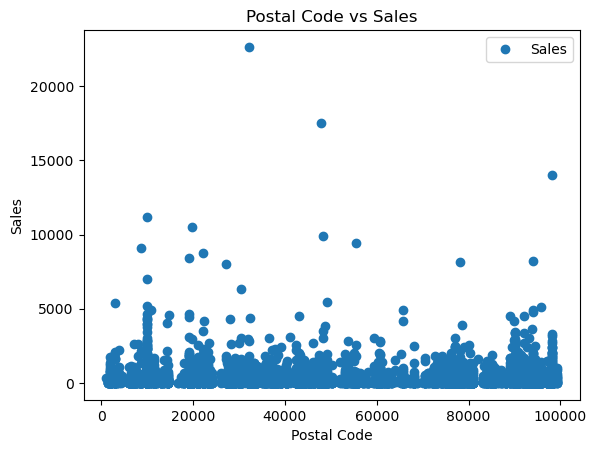

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

Store.plot(x = 'Postal Code', y='Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Postal Code vs Sales')  
plt.xlabel('Postal Code')  
plt.ylabel('Sales')  
plt.show()

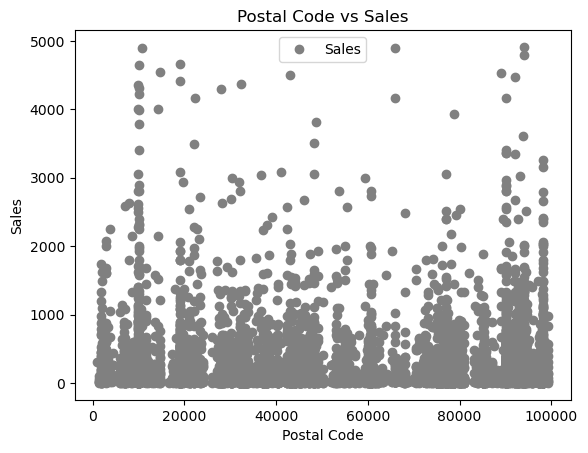

In [44]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

Store.plot(x = 'Postal Code', y='Sales', color='grey', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Postal Code vs Sales')  
plt.xlabel('Postal Code')  
plt.ylabel('Sales')  
plt.show()

### Hypothesis If  postal code of an area is 20000 it will generate a lower amount of sales for a state

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = Store['Postal Code'].values.reshape(-1,1)
y = Store['Sales'].values.reshape(-1,1)

In [18]:
X

array([[42420.],
       [42420.],
       [90036.],
       ...,
       [43615.],
       [43615.],
       [43615.]])

In [19]:
y

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [235.188],
       [ 26.376],
       [ 10.384]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

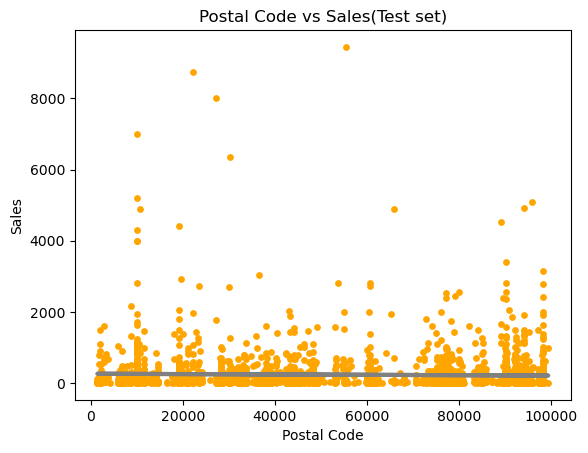

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='orange', s = 15)
plot_test.plot(X_test, y_predicted, color='grey', linewidth =3)
plot_test.title('Postal Code vs Sales(Test set)')
plot_test.xlabel('Postal Code')
plot_test.ylabel('Sales')
plot_test.show()

####The line shows that a  high volume of sales are  produced regardless of postal code and some postal codes have way more sales resulting in many outliers.

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00051327]]
Mean squared error:  307935.70765754575
R2 score:  0.000331440555276008


In [27]:
y_predicted

array([[248.84442054],
       [213.43516021],
       [242.47939709],
       ...,
       [213.94894042],
       [228.5365004 ],
       [249.48035829]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,901.950,248.844421
1,56.300,213.435160
2,184.704,242.479397
3,263.880,252.962361
4,124.360,254.508321
5,359.058,228.026313
6,866.400,239.519387
7,37.940,209.292583
8,16.224,237.457593
9,2803.920,213.433107


## Compare How Regression Fits The Training Set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00051327]]
Mean squared error:  426232.1316898559
R2 score:  0.0006322336503978843


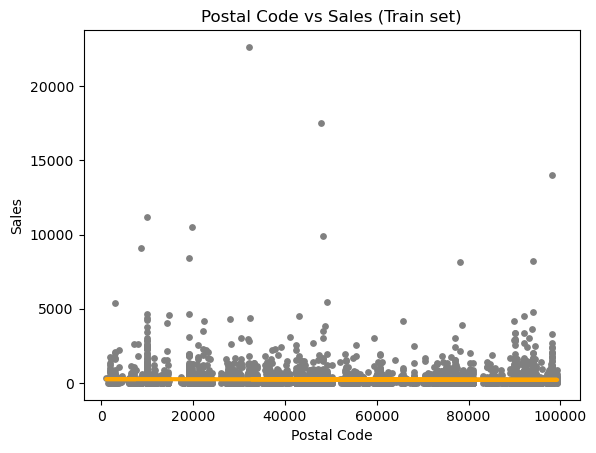

In [43]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='grey', s = 15)
plot_test.plot(X_train, y_predicted_train, color='orange', linewidth =3)
plot_test.title('Postal Code vs Sales (Train set)')
plot_test.xlabel('Postal Code')
plot_test.ylabel('Sales')
plot_test.show()

## Performance Improvement After Removing Outliers

In [33]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

Store = Store[Store['Sales'] <=5010] 

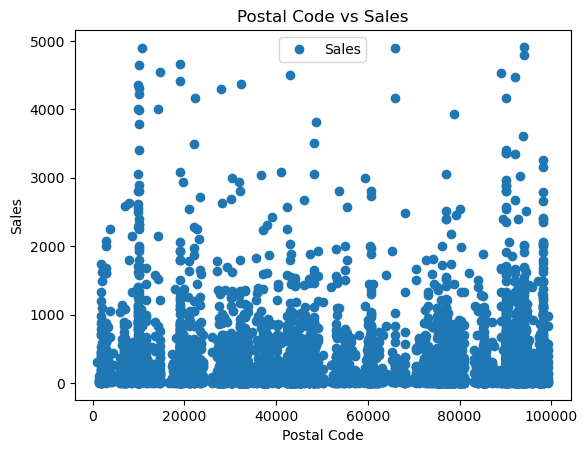

In [34]:
# See how the scatterplot looks without outliers.

Store.plot(x = 'Postal Code', y='Sales', style='o')  
plt.title('Postal Code vs Sales')  
plt.xlabel('Postal Code')  
plt.ylabel('Sales')  
plt.show()

In [35]:
# Reshape again.

X_2 = Store['Postal Code'].values.reshape(-1,1)
y_2 = Store['Sales'].values.reshape(-1,1)

In [36]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [37]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [38]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [39]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00016042]]
Mean squared error:  196209.70652991658
R2 score:  0.0003110287896149755


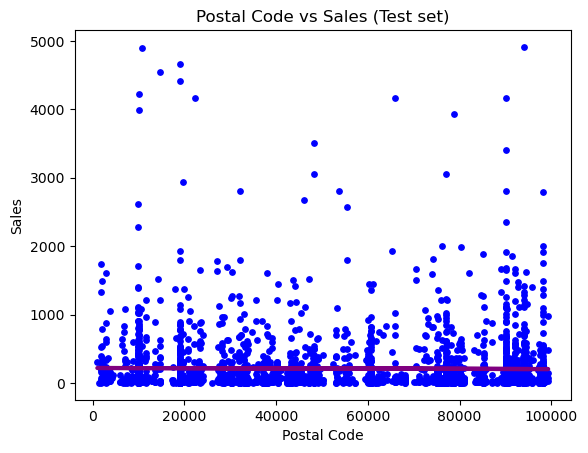

In [41]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='blue', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='purple', linewidth =3)
plot_test.title('Postal Code vs Sales (Test set)')
plot_test.xlabel('Postal Code')
plot_test.ylabel('Sales')
plot_test.show()

In [42]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,122.120,214.715616
1,8.820,204.143225
2,89.568,206.881411
3,39.880,204.143225
4,240.784,204.464865
5,6.976,207.195832
6,59.808,203.502353
7,14.880,218.944893
8,32.192,207.173534
9,36.560,217.634273


### This model is not a good fit for this data. The MSE is too large and the R2 is 0. Their is little to no slope resulting in a flat visual. There is no relationship between the variables as the slope is 0.

In [ ]:
#The data could be affected by bias as there is no way to know if every postal code was listed correct or if sales report had been tampered with.